In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data=pd.read_csv("C:/Recent Download/SOCR-HeightWeight.csv",index_col=0)
data.head()


,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 1 to 25000
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 585.9 KB


In [4]:
data.shape

(25000, 2)

In [5]:
#Missing Values
data.isnull().sum()


Height(Inches)    0
Weight(Pounds)    0
dtype: int64

So there are no missing values in the dataset

In [6]:


data.columns

Index(['Height(Inches)', 'Weight(Pounds)'], dtype='object')

In [7]:
data['Height(Inches)'].value_counts()

67.41672    3
67.94061    3
67.98509    3
68.92380    3
68.30287    3
           ..
68.14995    1
69.37021    1
69.75186    1
69.18731    1
70.30910    1
Name: Height(Inches), Length: 24503, dtype: int64

In [8]:
data['Height(Inches)'].nlargest()

Index
1894     75.15280
2482     75.11519
16753    74.84890
13682    74.74047
15210    74.59993
Name: Height(Inches), dtype: float64

Largest height is around 75

In [9]:
data['Weight(Pounds)'].value_counts()

124.7975    4
121.1097    3
126.7902    3
113.6650    3
123.9844    3
           ..
134.1670    1
144.0267    1
124.2302    1
131.7434    1
122.9518    1
Name: Weight(Pounds), Length: 24248, dtype: int64

In [10]:
data['Weight(Pounds)'].nlargest()

Index
10235    170.9240
17080    170.5479
7997     169.1268
4344     168.8810
368      168.2290
Name: Weight(Pounds), dtype: float64

170.92 pounds Is the highest weight in data

In [11]:
data.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


Looking at descriptive stats weight(pounds) column contains outliers

<AxesSubplot:>

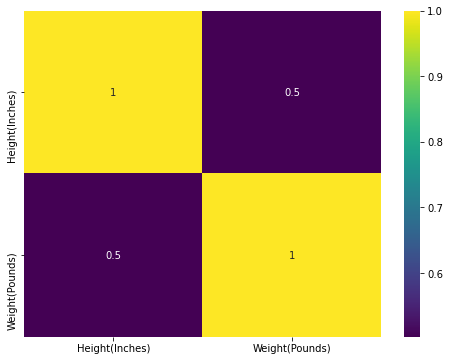

In [12]:
#Correlation
corr=data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,cmap='viridis',annot=True)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

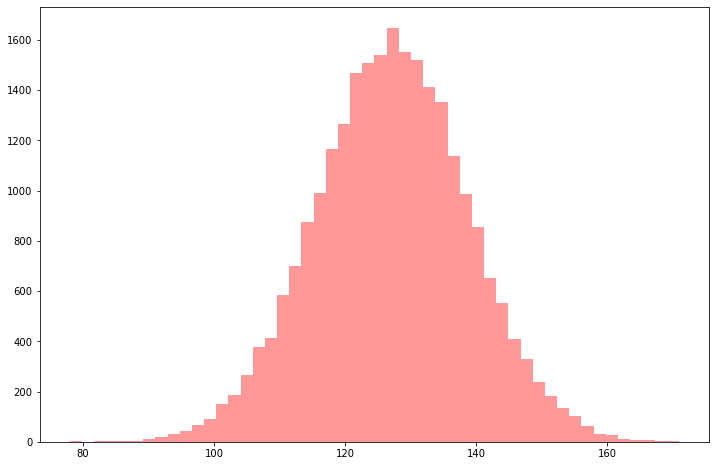

In [13]:
#histogram
plt.figure(figsize=(12,8))
sns.distplot(x=data['Weight(Pounds)'],kde=False,color='red')

<AxesSubplot:>

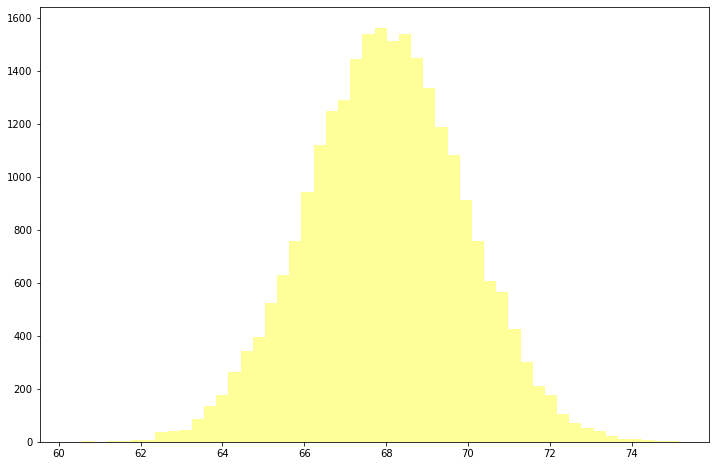

In [14]:
plt.figure(figsize=(12,8))
sns.distplot(x=data['Height(Inches)'],kde=False,color='yellow')

<AxesSubplot:xlabel='Height(Inches)'>

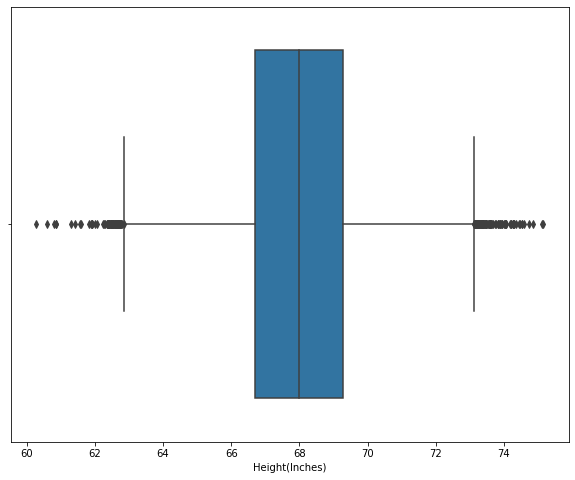

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Height(Inches)',data=data)

<AxesSubplot:xlabel='Weight(Pounds)'>

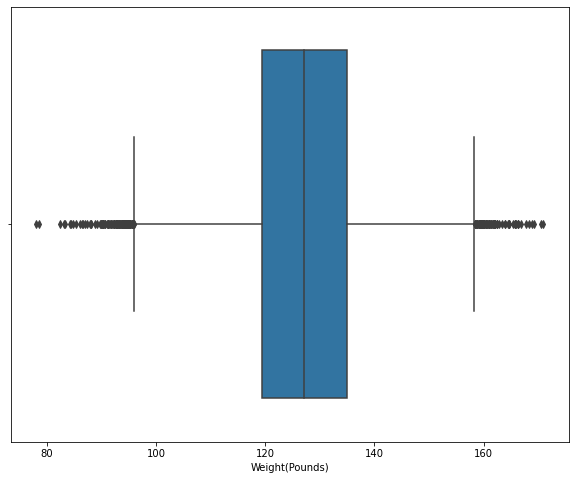

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Weight(Pounds)',data=data)

Looking at the plots it seems that both columns has outliers

In [17]:
#OUTLIERS for weights
Q1 = data['Weight(Pounds)'].quantile(0.25)
Q3 = data['Weight(Pounds)'].quantile(0.75)
Q1, Q3


(119.308675, 134.89285)

In [18]:
IQR=Q3-Q1

In [19]:
IQR

15.584175000000016

In [20]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(95.93241249999997, 158.26911250000003)

In [21]:
Q1 = data['Height(Inches)'].quantile(0.25)
Q3 = data['Height(Inches)'].quantile(0.75)
Q1, Q3

(66.7043975, 69.2729575)

In [22]:
IQR=Q3-Q1

In [23]:
IQR

2.568560000000005

In [24]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(62.85155749999999, 73.1257975)

In [25]:
#removing outliers
data[(data['Weight(Pounds)']<lower_limit)|(data['Weight(Pounds)']>upper_limit)]

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655


In [26]:
data[(data['Height(Inches)']<lower_limit)|(data['Height(Inches)']>upper_limit)]

,Height(Inches),Weight(Pounds)
Index,,
139,73.90107,151.3913
175,73.83364,139.2983
270,73.26872,130.2636
413,62.01666,109.0848
1134,62.75039,114.4900
...,...,...
23897,73.38057,154.3189
24079,73.22107,136.7360
24245,62.26498,104.1348


In [27]:
data_no_outlier_Height = data[(data['Height(Inches)']>lower_limit)&(data['Height(Inches)']<upper_limit)]
data_no_outlier_Height


,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
...,...,...
24996,69.50215,118.0312
24997,64.54826,120.1932
24998,64.69855,118.2655


In [28]:
#Splitting x and y 
data= pd.DataFrame(data_no_outlier_Height)
data.head()


,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [29]:
data.shape

(24833, 2)

In [30]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split


In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


In [35]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(19866, 1) (4967, 1) (19866,) (4967,)


In [62]:
#Creating linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predicting the test set
y_pred = regressor.predict(X_test)


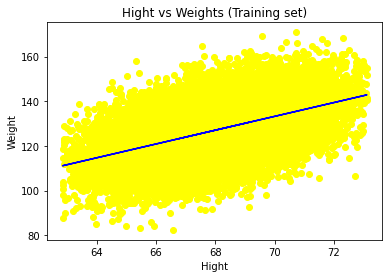

In [63]:
plt.scatter(X_train, y_train, color = 'Yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs Weights (Training set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()


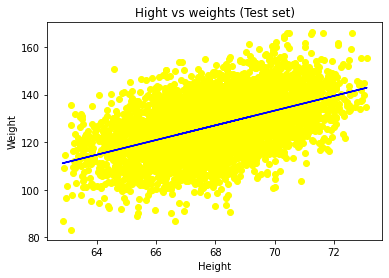

In [64]:
plt.scatter(X_test, y_test, color = 'Yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hight vs weights (Test set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()


In [65]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
print('Coefficients: ', regressor.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, y_test))


Coefficients:  [3.09487655]
Mean squared error: 101.50
Variance score: 0.24
